# Exploration done on the EPFL recommender system

In [1]:
from IPython.core.display import display, HTML
from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import train_test_split
import configparser
import mysql.connector as sql
import pandas as pd
import numpy as np
%config InlineBackend.figure_format = 'retina'

# Read the confidential token.
credentials = configparser.ConfigParser()
credentials.read('credentials.ini')
db_connection = sql.connect(host=credentials.get('mysql', 'url'),
                            database='semester_project_romain',
                            user=credentials.get('mysql', 'username'),
                            password=credentials.get('mysql', 'password'))

In [2]:
# Found courses that should be removed:
courses_to_remove = [
    "Admission année sup.",
    "Projet de master en systèmes de communication",
    "SHS : Introduction au projet",
    "Cycle master",
    "Projet de Master",
    "Groupe Core courses & options",
    "Bloc Projets et SHS",
    "Groupe 2 : Options",
    "Master SC",
    "Mineur",
    "Groupe 1",
    "Projet en systèmes de communication II",
    "Cours réservés spécifiquement aux étudiants s'inscrivant pour le mineur Area and Cultural Studies",
    "SHS : Projet",
    "Optional project in communication systems",
    "Mineur : Neurosciences computationnelles",
    "Stage d'ingénieur crédité avec le PDM (master en Systèmes de communication)",
    "Cours UNIL - Faculté des hautes études commerciales HEC I (printemps)",
]

domains_to_remove = [
    "Humanities and social sciences",
    "Programme Sciences humaines et sociales",
]

In [ ]:
# PlanType = "PLAN_EXAMINE" ?????
all_info = """
            select distinct 
                PersonID, 
                PedagogicalCode, 
                StudyDomain, 
                UnitName, 
                UnitID,
                SubjectName, 
                SubjectID,
                SectionName, 
                YearName,
                CourseCode
            from 
                course_enrolments_with_info 
            where 
                LevelName = "Master"
                and (YearName = "2010-2011"
                or YearName = "2011-2012"
                or YearName = "2012-2013"
                or YearName = "2013-2014"
                or YearName = "2014-2015"
                or YearName = "2015-2016")
            """
all_df = pd.read_sql(all_info, con=db_connection)
all_df = all_df[~all_df.SubjectName.isin(courses_to_remove)]
# Removing the SHS courses
all_df = all_df[~(all_df.StudyDomain.isin(domains_to_remove))]
print(all_df.UnitName.unique())
all_df

In [5]:
# PlanType = "PLAN_EXAMINE" ?????
all_info = """
            select distinct 
                PersonID, 
                PedagogicalCode, 
                StudyDomain, 
                UnitName, 
                UnitID,
                SubjectName, 
                SubjectID,
                SectionName, 
                YearName,
                CourseCode
            from 
                course_enrolments_with_info 
            where 
                UnitName like "%nform%" 
                and 
                LevelName = "Master"
                and (YearName = "2010-2011"
                or YearName = "2011-2012"
                or YearName = "2012-2013"
                or YearName = "2013-2014"
                or YearName = "2014-2015"
                or YearName = "2015-2016")
            """
all_df = pd.read_sql(all_info, con=db_connection)
all_df = all_df[~all_df.SubjectName.isin(courses_to_remove)]
# Removing the SHS courses
all_df = all_df[~(all_df.StudyDomain.isin(domains_to_remove))]
all_df

,PersonID,PedagogicalCode,StudyDomain,UnitName,UnitID,SubjectName,SubjectID,SectionName,YearName,CourseCode
0,254145864,MA2,Computer science,Informatique,249847,Computer vision,4650155,Informatique,2014-2015,None
1,898389891,MA2,Computer science,Informatique,249847,Distributed information systems,1773292,Informatique,2014-2015,CS-423
2,878085467,MA2,Electrical engineering,Informatique,249847,Social media,1501691751,Informatique,2014-2015,EE-593
3,353993617,MA2,Communication systems,Informatique,249847,Mobile networks,1771338,Informatique,2014-2015,None
4,354637713,MA2,Communication systems,Informatique,249847,Mobile networks,1771338,Informatique,2014-2015,COM-405
5,438981499,MA2,Computer science,Informatique,249847,Advanced computer architecture,1772055,Informatique,2014-2015,None
6,420576755,MA4,Electrical engineering,Informatique,249847,Media security,1771303,Systèmes de communication - master,2014-2015,None
8,245048742,MA2,Computer science,Informatique,249847,Distributed information systems,1773292,Informatique,2014-2015,None
9,898421111,MA2,Computer science,Informatique,249847,Real-time embedded systems,1771613,Informatique,2014-2015,CS-476
10,84133819,MA2,Computer science,Informatique,249847,Big Data,1678958548,Informatique,2014-2015,None


In [ ]:
current_courses = """
            select distinct 
                PedagogicalCode, 
                SubjectName, 
                SubjectID,
                StudyDomain,
                YearName
            from 
                course_enrolments_with_info 
            where 
                UnitName like "%ommunication%" 
                and 
                LevelName = "Master"
                and left(PedagogicalCode, 2) = "MA"
                and YearName = "2015-2016"
            """
current_courses_df = pd.read_sql(current_courses, con=db_connection)
# These are the current courses (latest data) given in syscom @EPFL
current_courses_df = current_courses_df[~current_courses_df.SubjectName.isin(courses_to_remove)]
current_courses_df = current_courses_df[~current_courses_df.StudyDomain.isin(domains_to_remove)]
current_courses_df

### Most taken courses
We need to find a way to get a cleaner dataset of courses, a lot of them are not usefull or outdated and should not be recommended.

In [6]:
# Taking a look at the most taken courses
registrations_df = all_df.set_index(['SubjectName', 'YearName'])
all_df_registrations = registrations_df.groupby(['SubjectName', 'YearName']).size()

registrations_df['Registration'] = all_df_registrations
registrations_df = registrations_df.reset_index()
# Pick only courses that have a study domain (removes bullshit)
# such as Projects and groups, minors etc
registrations_df = registrations_df[~registrations_df.StudyDomain.isnull()]
# Remove the SHS courses
registrations_df = registrations_df[~(registrations_df.StudyDomain == "Programme Sciences humaines et sociales")]
# Removes non important information
registrations_df = registrations_df.drop([
    'PersonID', "StudyDomain", "SectionName", "PedagogicalCode",
    "CourseCode"], axis=1)
registrations_df = registrations_df.drop_duplicates()
registrations_df = registrations_df.set_index(['SubjectName', 'YearName']).sort_index()
registrations = registrations_df.sort_values(ascending=False, by='Registration')

# Latest data registrations
registrations.xs('2015-2016', level='YearName')

,UnitName,UnitID,SubjectID,Registration
SubjectName,,,,
Distributed algorithms,Informatique,249847,1773287,256
Pattern classification and machine learning,Informatique,249847,1771468,248
Foundations of software,Informatique,249847,71840397,218
TCP/IP networking,Informatique,249847,1771764,218
Intelligent agents,Informatique,249847,1771183,214
Cryptography and security,Informatique,249847,1770973,202
Concurrent algorithms,Informatique,249847,231901032,180
Projet en informatique II,Informatique,249847,128676975,152
Unsupervised and reinforcement learning in neural networks,Informatique,249847,1771794,140


### Creating the binary matrix

In [7]:
courses_matrix = all_df[['PersonID', 'SubjectName']]
courses_matrix = courses_matrix.drop_duplicates()
courses_matrix = courses_matrix.set_index(['PersonID', 'SubjectName'])

def series_to_integers(series):
    "Converts a whole series to integers"
    return pd.to_numeric(series, downcast='integer')

# If the course was taken, set it to 1
courses_matrix['joined'] = 1
courses_matrix = courses_matrix.reset_index().pivot(index='PersonID', columns='SubjectName', values='joined')
courses_matrix = courses_matrix.fillna(0)
courses_matrix = courses_matrix.apply(series_to_integers)
courses_matrix

SubjectName,Accounting for finance,Advanced Course in Combinatorial Geometry & Optimization I,Advanced Topics in Cryptology,Advanced Topics in Distributed Systems,Advanced Topics in Human Computer Interaction: the Case of Recommender Systems,Advanced VLSI design,Advanced algorithms,Advanced analysis I,Advanced analysis II,Advanced compiler construction,...,Traitement quantique de l'information II,Unsupervised and reinforcement learning in neural networks,Using Mathematica to analyse and model experimental data,VLSI design I,VLSI design I + EDA TP,VLSI design II,Virtual reality,Équivalence échange I,Équivalence échange II,Équivalence échange III
PersonID,,,,,,,,,,,,,,,,,,,,,
2412404,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2414145,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2436004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2436718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2480734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2501514,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2501538,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2505593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2523797,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting test/train

In [ ]:
# Total matrix, use it to split train and test
registrations_total = courses_matrix.unstack().reset_index()
registrations_total = registrations_total.rename(columns={0: "Taken"})
#test_set = registrations_total.sample(frac=0.2, replace=False)
#train_set = registrations_total - test_set
train, test = train_test_split(registrations_total, test_size=0.2)
print("We have {} rows in total".format(len(registrations_total)))
print("Train: {} rows".format(len(train)))
print("Test: {} rows".format(len(test)))

In [ ]:
# Back to training matrix
courses_matrix = train.pivot(index='PersonID', columns='SubjectName', values="Taken")
courses_matrix = courses_matrix.fillna(0)
courses_matrix = courses_matrix.apply(series_to_integers)
courses_matrix

### Collaborative filtering through correlation matrix
We use the Jaccard score to compute the similarity matrix and then apply on the binary matrix to predict good courses to take. 

#### Collaborative filtering with Jaccard similarity

In [ ]:
from scipy.stats import entropy
from numpy.linalg import norm
import numpy as np

def JSD(P, Q):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

# Using the Jensen-Shannon similarity
corr_courses_matrix = pd.DataFrame(np.zeros((courses_matrix.T.shape[0], courses_matrix.T.shape[0])))
for i in range(courses_matrix.T.shape[0]):
    print("Computing similarity: {:.2f}%".format(100*i/courses_matrix.T.shape[0]), end="\r")
    for j in range(courses_matrix.T.shape[0]):
        corr_courses_matrix.iloc[i].iloc[j] = JSD(courses_matrix.T.iloc[i], courses_matrix.T.iloc[j])
        
corr_courses_matrix = 1 - corr_courses_matrix.replace([np.inf, -np.inf], 1)

print(corr_courses_matrix.shape)
print(corr_courses_matrix)

# Using Jaccard distance
#corr_courses_matrix = squareform(1 - pdist(courses_matrix.T, 'jaccard'))

# Using Pearson correlation
#corr_courses_matrix = np.corrcoef(courses_matrix.T)  

#corr_courses_matrix = squareform(pdist(courses_matrix.T, lambda x: JSD))

In [ ]:
course_index = courses_matrix.columns

def get_course_similarity(course):  
    '''Returns correlation vector for a course'''
    course_idx = list(course_index).index(course)
    return corr_courses_matrix[course_idx]

def get_course_recommendations(user_courses):  
    '''Given a set of courses, it returns all the courses with their similarity score'''
    course_similarities = np.zeros(corr_courses_matrix.shape[0])
    for course_id in user_courses:
        course_similarities = course_similarities + get_course_similarity(course_id)
    similarities_df = pd.DataFrame({
        'course_title': course_index,
        'sum_similarity': course_similarities
        })
    similarities_df = similarities_df[similarities_df.course_title.isin(user_courses)]
    similarities_df = similarities_df.sort_values(by=['sum_similarity'], ascending=False)
    return similarities_df

def recommend_row(user_row):
    sample_user = 1801481982
    sample_user_courses = list(user_row.sort_values(ascending=False).index)
    recommendations = get_course_recommendations(sample_user_courses)
    
# Le'ts try it out for a random user
#sample_user = 1801481982
sample_user = 1892490156
sample_user_courses = list(courses_matrix.loc[sample_user].sort_values(ascending=False).index)
recommendations = get_course_recommendations(sample_user_courses)

row = courses_matrix.loc[sample_user]
user_courses_as_list = list(row[row > 0].index)
# We get the top 20 recommended courses
print("The user {} has the following courses: \n- {}\
      \nso we recommend him to pick:"
      .format(sample_user,
              "\n- ".join(user_courses_as_list)))
# Only accept recommendations from latest data courses (2015-2016)
accepted_recommendations = recommendations[recommendations.course_title.isin(current_courses_df.SubjectName)]
# Removing bloat courses and courses that the user took
accepted_recommendations = accepted_recommendations.dropna()
accepted_recommendations = accepted_recommendations[~accepted_recommendations.course_title.isin(user_courses_as_list)]

# Normalizing the results by dividing by the maximum of the summed similarities
accepted_recommendations.sum_similarity = accepted_recommendations.sum_similarity / accepted_recommendations.sum_similarity.max()
accepted_recommendations

# Code used to predict one course:
#favoured_course = 'Distributed information systems'
#favoured_course_index = list(courses_index).index(favoured_course)
#P = corr_courses_matrix[favoured_course_index]

# list the courses with a high correlation with the favoured course
#print(list(courses_index[(P>0.3) & (P<1.0)])  

#### Collaborative filtering with KNN

In [ ]:
# Trying Surprise with KNN
from collections import defaultdict
from surprise.dataset import Reader
from surprise import SVD, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, Dataset, evaluate, print_perf, accuracy

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

def k_fold(data, algorithm):
    errors = []
    for trainset, testset in data.folds():
        # shut up while doing it
        from IPython.utils import io
        with io.capture_output() as captured:
            # train and test algorithm.
            algorithm.train(trainset)
        predictions = algorithm.test(testset)
        errors.append(accuracy.rmse(predictions, verbose=False))
    return errors

# Drop bullshit data
used_data = registrations_total

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 1))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(used_data[['PersonID', 'SubjectName', 'Taken']], reader)

In [ ]:
import matplotlib.pyplot as plt 

# how to make it shut up ?
# test and train with verbose=False ?
def try_knn(KNN_algo, sim_options, data):
    print("training: 0.00%", end='\r')
    k_values = np.arange(10, 60)
    results = []
    for k in k_values:
        algo = KNN_algo(k=k, sim_options=sim_options)
        errors = k_fold(data, algo)
        results.append((k, np.mean(errors)))
        print("training: {:.2f}%".format((k + 1 - k_values[0]) / len(k_values) * 100), end='\r')
    print("\ndone.")
    return results

In [ ]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True  # compute  similarities between items
               }

# K-fold to find the best k using KNNBaseline
knn_baseline_results = try_knn(KNNBaseline, sim_options, data)
print("RMSE for KNN Baseline:")
plt.plot(*zip(*knn_baseline_results))
plt.show()

best_rmse_tuple = sorted(knn_baseline_results, key=lambda x: x[1])[0]
print("The best RMSE is: {} for k = {}".format(best_rmse_tuple[1], best_rmse_tuple[0]))

In [ ]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True  # compute  similarities between items
               }
# Best one yet, after doing a k-fold on all of the other models: k=22
algo = KNNBaseline(k=22, sim_options=sim_options)
trainset = data.build_full_trainset()
algo.train(trainset)
testset = trainset.build_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

In [ ]:
# Evaluate performances of our algorithm on the dataset.
perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
print_perf(perf)

In [ ]:
print("Taken courses: ", "\n- ".join(list(courses_matrix.loc[946926890][courses_matrix.loc[946926890] == 1].index)))
print("predictions: ", ['Pattern classification and machine learning', 'TCP/IP networking', 'Mobile networks', 'Mineur : Management, technologie et entrepreneuriat', 'Cryptography and security', np.nan, np.nan, np.nan, np.nan, np.nan])

#### Collaborative filtering with NMF

In [ ]:
# Trying with NMF
from surprise import NMF
algo = NMF(biased=True, verbose=True)
errors = k_fold(data, algo)
np.mean(errors)

#### Collaborative filtering with SlopeOne

In [ ]:
# Trying with SlopeOne
from surprise import SlopeOne
algo = SlopeOne()
errors = k_fold(data, algo)
np.mean(errors)

#### Collaborative filtering with CoClustering

In [ ]:
# Trying with co-clustering
from surprise import CoClustering
algo = CoClustering(n_cltr_u=1, n_cltr_i=8, n_epochs=50, verbose=True)
errors = k_fold(data, algo)
np.mean(errors)

#### Collaborative filtering with Collaborative Denoising Auto-Encoders

In [162]:
from keras.layers import Input, Dense, Embedding, Flatten, Dropout, merge, Activation
from keras.models import Model
from keras.regularizers import l2

def create(I, U, K, hidden_activation, output_activation, q=0.5, l=0.01):
    '''
    create model
    Reference:
      Yao Wu, Christopher DuBois, Alice X. Zheng, Martin Ester.
        Collaborative Denoising Auto-Encoders for Top-N Recommender Systems.
          The 9th ACM International Conference on Web Search and Data Mining (WSDM'16), p153--162, 2016.

    :param I: number of items
    :param U: number of users
    :param K: number of units in hidden layer
    :param hidden_activation: activation function of hidden layer
    :param output_activation: activation function of output layer
    :param q: drop probability
    :param l: regularization parameter of L2 regularization
    :return: CDAE
    :rtype: keras.models.Model
    '''
    x_item = Input((I,), name='x_item')
    h_item = Dropout(q)(x_item)
    h_item = Dense(K, W_regularizer=l2(l), b_regularizer=l2(l))(h_item)

    # dtype should be int to connect to Embedding layer
    x_user = Input((1,), dtype='int32', name='x_user')
    h_user = Embedding(input_dim=U, output_dim=K, input_length=1, W_regularizer=l2(l))(x_user)
    h_user = Flatten()(h_user)

    h = merge([h_item, h_user], mode='sum')
    if hidden_activation:
        h = Activation(hidden_activation)(h)
    y = Dense(I, activation=output_activation)(h)

    return Model(input=[x_item, x_user], output=y)

def success_rate(pred, true):
    cnt = 0
    for i in range(pred.shape[0]):
        t = np.where(true[i] == 1) # true set
        ary = np.intersect1d(pred[i], t)
        if ary.size > 0:
            cnt += 1
    return cnt * 100 / pred.shape[0]


train_users = np.arange(courses_matrix.shape[0])
test_users = np.arange(courses_matrix.shape[0])

flatten_matrix = courses_matrix.unstack().reset_index()

test_x = flatten_matrix.sample(frac=0.2, replace=False).set_index(['SubjectName', 'PersonID'])
test_x = test_x.pivot_table(index='PersonID', columns="SubjectName").fillna(0)
train_x = courses_matrix - test_x
train_x = train_x.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()
test_x = test_x.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()


In [165]:
train_x_users = np.array(train_users, dtype=np.int32).reshape(len(train_users), 1)
test_x_users = np.array(test_users, dtype=np.int32).reshape(len(test_users), 1)

# model
# Q was 0.50, now 0.998 ?
model = create(I=train_x.shape[1], U=len(train_users)+1, K=21,
                    hidden_activation='relu', output_activation='sigmoid', q=0.998, l=0.01)
model.compile(loss='mean_absolute_error', optimizer='adam') 
#model.summary()

# train
history = model.fit(x=[train_x, train_x_users], y=train_x,
                    batch_size=128, nb_epoch=2000, verbose=1,
                    #validation_data=[[test_x, test_x_users],
                    #test_x])
                    validation_split=0.10)

# predict
#pred = model.predict(x=[train_x, np.array(train_users, dtype=np.int32).reshape(len(train_users), 1)])
pred = model.predict(x=[test_x, np.array(test_users, dtype=np.int32).reshape(len(test_users), 1)])
pred = pred * (train_x == 0) # remove watched items from predictions

pred = np.argsort(pred)

for n in range(1, 11):
    sr = success_rate(pred[:, -n:], test_x)
    print("Success Rate at {:d}: {:f}".format(n, sr))

/home/romain/Projects/course-recommendation/env/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(21, kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
/home/romain/Projects/course-recommendation/env/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(input_dim=704, output_dim=21, input_length=1, embeddings_regularizer=<keras.reg...)`
/home/romain/Projects/course-recommendation/env/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/home/romain/Projects/course-recommendation/env/lib/python3.6/site-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add

Train on 632 samples, validate on 71 samples
Epoch 1/2000
632/632 [==============================] - 0s - loss: 0.9917 - val_loss: 0.9410
Epoch 2/2000
632/632 [==============================] - 0s - loss: 0.9130 - val_loss: 0.8688
Epoch 3/2000
632/632 [==============================] - 0s - loss: 0.8459 - val_loss: 0.8072
Epoch 4/2000
632/632 [==============================] - 0s - loss: 0.7867 - val_loss: 0.7549
Epoch 5/2000
632/632 [==============================] - 0s - loss: 0.7378 - val_loss: 0.7107
Epoch 6/2000
632/632 [==============================] - 0s - loss: 0.6973 - val_loss: 0.6733
Epoch 7/2000
632/632 [==============================] - 0s - loss: 0.6623 - val_loss: 0.6415
Epoch 8/2000
632/632 [==============================] - 0s - loss: 0.6334 - val_loss: 0.6143
Epoch 9/2000
632/632 [==============================] - 0s - loss: 0.6071 - val_loss: 0.5907
Epoch 10/2000
632/632 [==============================] - 0s - loss: 0.5815 - val_loss: 0.5699
Epoch 11/2000
632/632 [=

632/632 [==============================] - 0s - loss: 0.0990 - val_loss: 0.1010
Epoch 88/2000
632/632 [==============================] - 0s - loss: 0.0986 - val_loss: 0.1003
Epoch 89/2000
632/632 [==============================] - 0s - loss: 0.0979 - val_loss: 0.0998
Epoch 90/2000
632/632 [==============================] - 0s - loss: 0.0978 - val_loss: 0.0994
Epoch 91/2000
632/632 [==============================] - 0s - loss: 0.0973 - val_loss: 0.0990
Epoch 92/2000
632/632 [==============================] - 0s - loss: 0.0967 - val_loss: 0.0987
Epoch 93/2000
632/632 [==============================] - 0s - loss: 0.0964 - val_loss: 0.0982
Epoch 94/2000
632/632 [==============================] - 0s - loss: 0.0955 - val_loss: 0.0979
Epoch 95/2000
632/632 [==============================] - 0s - loss: 0.0955 - val_loss: 0.0976
Epoch 96/2000
632/632 [==============================] - 0s - loss: 0.0949 - val_loss: 0.0975
Epoch 97/2000
632/632 [==============================] - 0s - loss: 0.0944

632/632 [==============================] - 0s - loss: 0.0760 - val_loss: 0.0822
Epoch 174/2000
632/632 [==============================] - 0s - loss: 0.0759 - val_loss: 0.0818
Epoch 175/2000
632/632 [==============================] - 0s - loss: 0.0756 - val_loss: 0.0816
Epoch 176/2000
632/632 [==============================] - 0s - loss: 0.0756 - val_loss: 0.0812
Epoch 177/2000
632/632 [==============================] - 0s - loss: 0.0753 - val_loss: 0.0808
Epoch 178/2000
632/632 [==============================] - 0s - loss: 0.0753 - val_loss: 0.0805
Epoch 179/2000
632/632 [==============================] - 0s - loss: 0.0750 - val_loss: 0.0803
Epoch 180/2000
632/632 [==============================] - 0s - loss: 0.0750 - val_loss: 0.0803
Epoch 181/2000
632/632 [==============================] - 0s - loss: 0.0747 - val_loss: 0.0803
Epoch 182/2000
632/632 [==============================] - 0s - loss: 0.0748 - val_loss: 0.0802
Epoch 183/2000
632/632 [==============================] - 0s - lo

632/632 [==============================] - 0s - loss: 0.0656 - val_loss: 0.0709
Epoch 260/2000
632/632 [==============================] - 0s - loss: 0.0653 - val_loss: 0.0708
Epoch 261/2000
632/632 [==============================] - 0s - loss: 0.0653 - val_loss: 0.0708
Epoch 262/2000
632/632 [==============================] - 0s - loss: 0.0650 - val_loss: 0.0707
Epoch 263/2000
632/632 [==============================] - 0s - loss: 0.0650 - val_loss: 0.0708
Epoch 264/2000
632/632 [==============================] - 0s - loss: 0.0649 - val_loss: 0.0708
Epoch 265/2000
632/632 [==============================] - 0s - loss: 0.0648 - val_loss: 0.0708
Epoch 266/2000
632/632 [==============================] - 0s - loss: 0.0648 - val_loss: 0.0707
Epoch 267/2000
632/632 [==============================] - 0s - loss: 0.0647 - val_loss: 0.0706
Epoch 268/2000
632/632 [==============================] - 0s - loss: 0.0645 - val_loss: 0.0706
Epoch 269/2000
632/632 [==============================] - 0s - lo

632/632 [==============================] - 0s - loss: 0.0585 - val_loss: 0.0646
Epoch 346/2000
632/632 [==============================] - 0s - loss: 0.0585 - val_loss: 0.0646
Epoch 347/2000
632/632 [==============================] - 0s - loss: 0.0583 - val_loss: 0.0642
Epoch 348/2000
632/632 [==============================] - 0s - loss: 0.0584 - val_loss: 0.0641
Epoch 349/2000
632/632 [==============================] - 0s - loss: 0.0584 - val_loss: 0.0642
Epoch 350/2000
632/632 [==============================] - 0s - loss: 0.0584 - val_loss: 0.0641
Epoch 351/2000
632/632 [==============================] - 0s - loss: 0.0583 - val_loss: 0.0640
Epoch 352/2000
632/632 [==============================] - 0s - loss: 0.0584 - val_loss: 0.0639
Epoch 353/2000
632/632 [==============================] - 0s - loss: 0.0583 - val_loss: 0.0639
Epoch 354/2000
632/632 [==============================] - 0s - loss: 0.0583 - val_loss: 0.0640
Epoch 355/2000
632/632 [==============================] - 0s - lo

632/632 [==============================] - 0s - loss: 0.0543 - val_loss: 0.0603
Epoch 432/2000
632/632 [==============================] - 0s - loss: 0.0542 - val_loss: 0.0602
Epoch 433/2000
632/632 [==============================] - 0s - loss: 0.0542 - val_loss: 0.0600
Epoch 434/2000
632/632 [==============================] - 0s - loss: 0.0541 - val_loss: 0.0597
Epoch 435/2000
632/632 [==============================] - 0s - loss: 0.0540 - val_loss: 0.0596
Epoch 436/2000
632/632 [==============================] - 0s - loss: 0.0539 - val_loss: 0.0596
Epoch 437/2000
632/632 [==============================] - 0s - loss: 0.0538 - val_loss: 0.0596
Epoch 438/2000
632/632 [==============================] - 0s - loss: 0.0537 - val_loss: 0.0596
Epoch 439/2000
632/632 [==============================] - 0s - loss: 0.0537 - val_loss: 0.0596
Epoch 440/2000
632/632 [==============================] - 0s - loss: 0.0535 - val_loss: 0.0596
Epoch 441/2000
632/632 [==============================] - 0s - lo

632/632 [==============================] - 0s - loss: 0.0507 - val_loss: 0.0573
Epoch 518/2000
632/632 [==============================] - 0s - loss: 0.0507 - val_loss: 0.0574
Epoch 519/2000
632/632 [==============================] - 0s - loss: 0.0507 - val_loss: 0.0575
Epoch 520/2000
632/632 [==============================] - 0s - loss: 0.0508 - val_loss: 0.0574
Epoch 521/2000
632/632 [==============================] - 0s - loss: 0.0510 - val_loss: 0.0575
Epoch 522/2000
632/632 [==============================] - 0s - loss: 0.0511 - val_loss: 0.0575
Epoch 523/2000
632/632 [==============================] - 0s - loss: 0.0511 - val_loss: 0.0575
Epoch 524/2000
632/632 [==============================] - 0s - loss: 0.0510 - val_loss: 0.0574
Epoch 525/2000
632/632 [==============================] - 0s - loss: 0.0509 - val_loss: 0.0573
Epoch 526/2000
632/632 [==============================] - 0s - loss: 0.0508 - val_loss: 0.0573
Epoch 527/2000
632/632 [==============================] - 0s - lo

632/632 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0554
Epoch 604/2000
632/632 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0555
Epoch 605/2000
632/632 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0554
Epoch 606/2000
632/632 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0553
Epoch 607/2000
632/632 [==============================] - 0s - loss: 0.0481 - val_loss: 0.0551
Epoch 608/2000
632/632 [==============================] - 0s - loss: 0.0481 - val_loss: 0.0549
Epoch 609/2000
632/632 [==============================] - 0s - loss: 0.0480 - val_loss: 0.0548
Epoch 610/2000
632/632 [==============================] - 0s - loss: 0.0480 - val_loss: 0.0547
Epoch 611/2000
632/632 [==============================] - 0s - loss: 0.0478 - val_loss: 0.0545
Epoch 612/2000
632/632 [==============================] - 0s - loss: 0.0478 - val_loss: 0.0544
Epoch 613/2000
632/632 [==============================] - 0s - lo

632/632 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0531
Epoch 690/2000
632/632 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0532
Epoch 691/2000
632/632 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0532
Epoch 692/2000
632/632 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0533
Epoch 693/2000
632/632 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0532
Epoch 694/2000
632/632 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0532
Epoch 695/2000
632/632 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0532
Epoch 696/2000
632/632 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0531
Epoch 697/2000
632/632 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0530
Epoch 698/2000
632/632 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0530
Epoch 699/2000
632/632 [==============================] - 0s - lo

632/632 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0514
Epoch 776/2000
632/632 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0514
Epoch 777/2000
632/632 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0514
Epoch 778/2000
632/632 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0515
Epoch 779/2000
632/632 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0515
Epoch 780/2000
632/632 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0516
Epoch 781/2000
632/632 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0516
Epoch 782/2000
632/632 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0514
Epoch 783/2000
632/632 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0513
Epoch 784/2000
632/632 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0512
Epoch 785/2000
632/632 [==============================] - 0s - lo

632/632 [==============================] - 0s - loss: 0.0429 - val_loss: 0.0501
Epoch 862/2000
632/632 [==============================] - 0s - loss: 0.0428 - val_loss: 0.0501
Epoch 863/2000
632/632 [==============================] - 0s - loss: 0.0429 - val_loss: 0.0500
Epoch 864/2000
632/632 [==============================] - 0s - loss: 0.0428 - val_loss: 0.0500
Epoch 865/2000
632/632 [==============================] - 0s - loss: 0.0428 - val_loss: 0.0498
Epoch 866/2000
632/632 [==============================] - 0s - loss: 0.0427 - val_loss: 0.0497
Epoch 867/2000
632/632 [==============================] - 0s - loss: 0.0426 - val_loss: 0.0497
Epoch 868/2000
632/632 [==============================] - 0s - loss: 0.0426 - val_loss: 0.0497
Epoch 869/2000
632/632 [==============================] - 0s - loss: 0.0425 - val_loss: 0.0497
Epoch 870/2000
632/632 [==============================] - 0s - loss: 0.0425 - val_loss: 0.0498
Epoch 871/2000
632/632 [==============================] - 0s - lo

632/632 [==============================] - 0s - loss: 0.0416 - val_loss: 0.0491
Epoch 948/2000
632/632 [==============================] - 0s - loss: 0.0416 - val_loss: 0.0490
Epoch 949/2000
632/632 [==============================] - 0s - loss: 0.0415 - val_loss: 0.0490
Epoch 950/2000
632/632 [==============================] - 0s - loss: 0.0414 - val_loss: 0.0489
Epoch 951/2000
632/632 [==============================] - 0s - loss: 0.0414 - val_loss: 0.0489
Epoch 952/2000
632/632 [==============================] - 0s - loss: 0.0413 - val_loss: 0.0489
Epoch 953/2000
632/632 [==============================] - 0s - loss: 0.0412 - val_loss: 0.0489
Epoch 954/2000
632/632 [==============================] - 0s - loss: 0.0412 - val_loss: 0.0488
Epoch 955/2000
632/632 [==============================] - 0s - loss: 0.0411 - val_loss: 0.0488
Epoch 956/2000
632/632 [==============================] - 0s - loss: 0.0411 - val_loss: 0.0488
Epoch 957/2000
632/632 [==============================] - 0s - lo

632/632 [==============================] - 0s - loss: 0.0405 - val_loss: 0.0480
Epoch 1033/2000
632/632 [==============================] - 0s - loss: 0.0406 - val_loss: 0.0479
Epoch 1034/2000
632/632 [==============================] - 0s - loss: 0.0406 - val_loss: 0.0477
Epoch 1035/2000
632/632 [==============================] - 0s - loss: 0.0406 - val_loss: 0.0476
Epoch 1036/2000
632/632 [==============================] - 0s - loss: 0.0405 - val_loss: 0.0475
Epoch 1037/2000
632/632 [==============================] - 0s - loss: 0.0405 - val_loss: 0.0475
Epoch 1038/2000
632/632 [==============================] - 0s - loss: 0.0405 - val_loss: 0.0475
Epoch 1039/2000
632/632 [==============================] - 0s - loss: 0.0406 - val_loss: 0.0475
Epoch 1040/2000
632/632 [==============================] - 0s - loss: 0.0406 - val_loss: 0.0475
Epoch 1041/2000
632/632 [==============================] - 0s - loss: 0.0406 - val_loss: 0.0475
Epoch 1042/2000
632/632 [==============================]

632/632 [==============================] - 0s - loss: 0.0394 - val_loss: 0.0471
Epoch 1118/2000
632/632 [==============================] - 0s - loss: 0.0394 - val_loss: 0.0471
Epoch 1119/2000
632/632 [==============================] - 0s - loss: 0.0394 - val_loss: 0.0472
Epoch 1120/2000
632/632 [==============================] - 0s - loss: 0.0394 - val_loss: 0.0472
Epoch 1121/2000
632/632 [==============================] - 0s - loss: 0.0395 - val_loss: 0.0473
Epoch 1122/2000
632/632 [==============================] - 0s - loss: 0.0395 - val_loss: 0.0473
Epoch 1123/2000
632/632 [==============================] - 0s - loss: 0.0395 - val_loss: 0.0473
Epoch 1124/2000
632/632 [==============================] - 0s - loss: 0.0395 - val_loss: 0.0473
Epoch 1125/2000
632/632 [==============================] - 0s - loss: 0.0395 - val_loss: 0.0473
Epoch 1126/2000
632/632 [==============================] - 0s - loss: 0.0394 - val_loss: 0.0473
Epoch 1127/2000
632/632 [==============================]

632/632 [==============================] - 0s - loss: 0.0386 - val_loss: 0.0462
Epoch 1203/2000
632/632 [==============================] - 0s - loss: 0.0385 - val_loss: 0.0462
Epoch 1204/2000
632/632 [==============================] - 0s - loss: 0.0385 - val_loss: 0.0462
Epoch 1205/2000
632/632 [==============================] - 0s - loss: 0.0385 - val_loss: 0.0463
Epoch 1206/2000
632/632 [==============================] - 0s - loss: 0.0385 - val_loss: 0.0464
Epoch 1207/2000
632/632 [==============================] - 0s - loss: 0.0386 - val_loss: 0.0465
Epoch 1208/2000
632/632 [==============================] - 0s - loss: 0.0386 - val_loss: 0.0465
Epoch 1209/2000
632/632 [==============================] - 0s - loss: 0.0386 - val_loss: 0.0465
Epoch 1210/2000
632/632 [==============================] - 0s - loss: 0.0385 - val_loss: 0.0465
Epoch 1211/2000
632/632 [==============================] - 0s - loss: 0.0385 - val_loss: 0.0463
Epoch 1212/2000
632/632 [==============================]

632/632 [==============================] - 0s - loss: 0.0378 - val_loss: 0.0455
Epoch 1288/2000
632/632 [==============================] - 0s - loss: 0.0377 - val_loss: 0.0455
Epoch 1289/2000
632/632 [==============================] - 0s - loss: 0.0378 - val_loss: 0.0455
Epoch 1290/2000
632/632 [==============================] - 0s - loss: 0.0377 - val_loss: 0.0455
Epoch 1291/2000
632/632 [==============================] - 0s - loss: 0.0377 - val_loss: 0.0455
Epoch 1292/2000
632/632 [==============================] - 0s - loss: 0.0376 - val_loss: 0.0455
Epoch 1293/2000
632/632 [==============================] - 0s - loss: 0.0376 - val_loss: 0.0456
Epoch 1294/2000
632/632 [==============================] - 0s - loss: 0.0376 - val_loss: 0.0456
Epoch 1295/2000
632/632 [==============================] - 0s - loss: 0.0377 - val_loss: 0.0457
Epoch 1296/2000
632/632 [==============================] - 0s - loss: 0.0377 - val_loss: 0.0457
Epoch 1297/2000
632/632 [==============================]

632/632 [==============================] - 0s - loss: 0.0371 - val_loss: 0.0451
Epoch 1373/2000
632/632 [==============================] - 0s - loss: 0.0372 - val_loss: 0.0450
Epoch 1374/2000
632/632 [==============================] - 0s - loss: 0.0372 - val_loss: 0.0450
Epoch 1375/2000
632/632 [==============================] - 0s - loss: 0.0372 - val_loss: 0.0451
Epoch 1376/2000
632/632 [==============================] - 0s - loss: 0.0373 - val_loss: 0.0452
Epoch 1377/2000
632/632 [==============================] - 0s - loss: 0.0373 - val_loss: 0.0453
Epoch 1378/2000
632/632 [==============================] - 0s - loss: 0.0374 - val_loss: 0.0453
Epoch 1379/2000
632/632 [==============================] - 0s - loss: 0.0374 - val_loss: 0.0452
Epoch 1380/2000
632/632 [==============================] - 0s - loss: 0.0373 - val_loss: 0.0452
Epoch 1381/2000
632/632 [==============================] - 0s - loss: 0.0372 - val_loss: 0.0451
Epoch 1382/2000
632/632 [==============================]

632/632 [==============================] - 0s - loss: 0.0372 - val_loss: 0.0450
Epoch 1458/2000
632/632 [==============================] - 0s - loss: 0.0371 - val_loss: 0.0449
Epoch 1459/2000
632/632 [==============================] - 0s - loss: 0.0370 - val_loss: 0.0449
Epoch 1460/2000
632/632 [==============================] - 0s - loss: 0.0370 - val_loss: 0.0448
Epoch 1461/2000
632/632 [==============================] - 0s - loss: 0.0369 - val_loss: 0.0448
Epoch 1462/2000
632/632 [==============================] - 0s - loss: 0.0370 - val_loss: 0.0449
Epoch 1463/2000
632/632 [==============================] - 0s - loss: 0.0370 - val_loss: 0.0449
Epoch 1464/2000
632/632 [==============================] - 0s - loss: 0.0370 - val_loss: 0.0448
Epoch 1465/2000
632/632 [==============================] - 0s - loss: 0.0370 - val_loss: 0.0448
Epoch 1466/2000
632/632 [==============================] - 0s - loss: 0.0369 - val_loss: 0.0447
Epoch 1467/2000
632/632 [==============================]

632/632 [==============================] - 0s - loss: 0.0364 - val_loss: 0.0446
Epoch 1543/2000
632/632 [==============================] - 0s - loss: 0.0365 - val_loss: 0.0446
Epoch 1544/2000
632/632 [==============================] - 0s - loss: 0.0365 - val_loss: 0.0446
Epoch 1545/2000
632/632 [==============================] - 0s - loss: 0.0365 - val_loss: 0.0445
Epoch 1546/2000
632/632 [==============================] - 0s - loss: 0.0364 - val_loss: 0.0445
Epoch 1547/2000
632/632 [==============================] - 0s - loss: 0.0364 - val_loss: 0.0444
Epoch 1548/2000
632/632 [==============================] - 0s - loss: 0.0364 - val_loss: 0.0444
Epoch 1549/2000
632/632 [==============================] - 0s - loss: 0.0364 - val_loss: 0.0444
Epoch 1550/2000
632/632 [==============================] - 0s - loss: 0.0364 - val_loss: 0.0445
Epoch 1551/2000
632/632 [==============================] - 0s - loss: 0.0364 - val_loss: 0.0445
Epoch 1552/2000
632/632 [==============================]

632/632 [==============================] - 0s - loss: 0.0357 - val_loss: 0.0439
Epoch 1628/2000
632/632 [==============================] - 0s - loss: 0.0358 - val_loss: 0.0439
Epoch 1629/2000
632/632 [==============================] - 0s - loss: 0.0358 - val_loss: 0.0439
Epoch 1630/2000
632/632 [==============================] - 0s - loss: 0.0358 - val_loss: 0.0439
Epoch 1631/2000
632/632 [==============================] - 0s - loss: 0.0358 - val_loss: 0.0439
Epoch 1632/2000
632/632 [==============================] - 0s - loss: 0.0359 - val_loss: 0.0440
Epoch 1633/2000
632/632 [==============================] - 0s - loss: 0.0360 - val_loss: 0.0440
Epoch 1634/2000
632/632 [==============================] - 0s - loss: 0.0360 - val_loss: 0.0440
Epoch 1635/2000
632/632 [==============================] - 0s - loss: 0.0360 - val_loss: 0.0439
Epoch 1636/2000
632/632 [==============================] - 0s - loss: 0.0360 - val_loss: 0.0439
Epoch 1637/2000
632/632 [==============================]

632/632 [==============================] - 0s - loss: 0.0356 - val_loss: 0.0437
Epoch 1713/2000
632/632 [==============================] - 0s - loss: 0.0356 - val_loss: 0.0437
Epoch 1714/2000
632/632 [==============================] - 0s - loss: 0.0356 - val_loss: 0.0437
Epoch 1715/2000
632/632 [==============================] - 0s - loss: 0.0356 - val_loss: 0.0437
Epoch 1716/2000
632/632 [==============================] - 0s - loss: 0.0356 - val_loss: 0.0437
Epoch 1717/2000
632/632 [==============================] - 0s - loss: 0.0356 - val_loss: 0.0437
Epoch 1718/2000
632/632 [==============================] - 0s - loss: 0.0355 - val_loss: 0.0436
Epoch 1719/2000
632/632 [==============================] - 0s - loss: 0.0354 - val_loss: 0.0436
Epoch 1720/2000
632/632 [==============================] - 0s - loss: 0.0354 - val_loss: 0.0435
Epoch 1721/2000
632/632 [==============================] - 0s - loss: 0.0354 - val_loss: 0.0435
Epoch 1722/2000
632/632 [==============================]

632/632 [==============================] - 0s - loss: 0.0349 - val_loss: 0.0430
Epoch 1798/2000
632/632 [==============================] - 0s - loss: 0.0348 - val_loss: 0.0430
Epoch 1799/2000
632/632 [==============================] - 0s - loss: 0.0349 - val_loss: 0.0430
Epoch 1800/2000
632/632 [==============================] - 0s - loss: 0.0349 - val_loss: 0.0430
Epoch 1801/2000
632/632 [==============================] - 0s - loss: 0.0349 - val_loss: 0.0431
Epoch 1802/2000
632/632 [==============================] - 0s - loss: 0.0349 - val_loss: 0.0431
Epoch 1803/2000
632/632 [==============================] - 0s - loss: 0.0349 - val_loss: 0.0431
Epoch 1804/2000
632/632 [==============================] - 0s - loss: 0.0349 - val_loss: 0.0431
Epoch 1805/2000
632/632 [==============================] - 0s - loss: 0.0349 - val_loss: 0.0431
Epoch 1806/2000
632/632 [==============================] - 0s - loss: 0.0348 - val_loss: 0.0431
Epoch 1807/2000
632/632 [==============================]

632/632 [==============================] - 0s - loss: 0.0346 - val_loss: 0.0428
Epoch 1883/2000
632/632 [==============================] - 0s - loss: 0.0346 - val_loss: 0.0428
Epoch 1884/2000
632/632 [==============================] - 0s - loss: 0.0346 - val_loss: 0.0428
Epoch 1885/2000
632/632 [==============================] - 0s - loss: 0.0346 - val_loss: 0.0428
Epoch 1886/2000
632/632 [==============================] - 0s - loss: 0.0346 - val_loss: 0.0428
Epoch 1887/2000
632/632 [==============================] - 0s - loss: 0.0345 - val_loss: 0.0427
Epoch 1888/2000
632/632 [==============================] - 0s - loss: 0.0345 - val_loss: 0.0427
Epoch 1889/2000
632/632 [==============================] - 0s - loss: 0.0345 - val_loss: 0.0427
Epoch 1890/2000
632/632 [==============================] - 0s - loss: 0.0346 - val_loss: 0.0428
Epoch 1891/2000
632/632 [==============================] - 0s - loss: 0.0345 - val_loss: 0.0427
Epoch 1892/2000
632/632 [==============================]

632/632 [==============================] - 0s - loss: 0.0342 - val_loss: 0.0424
Epoch 1968/2000
632/632 [==============================] - 0s - loss: 0.0341 - val_loss: 0.0424
Epoch 1969/2000
632/632 [==============================] - 0s - loss: 0.0341 - val_loss: 0.0424
Epoch 1970/2000
632/632 [==============================] - 0s - loss: 0.0341 - val_loss: 0.0423
Epoch 1971/2000
632/632 [==============================] - 0s - loss: 0.0341 - val_loss: 0.0423
Epoch 1972/2000
632/632 [==============================] - 0s - loss: 0.0341 - val_loss: 0.0423
Epoch 1973/2000
632/632 [==============================] - 0s - loss: 0.0341 - val_loss: 0.0423
Epoch 1974/2000
632/632 [==============================] - 0s - loss: 0.0341 - val_loss: 0.0423
Epoch 1975/2000
632/632 [==============================] - 0s - loss: 0.0341 - val_loss: 0.0424
Epoch 1976/2000
632/632 [==============================] - 0s - loss: 0.0342 - val_loss: 0.0425
Epoch 1977/2000
632/632 [==============================]

In [ ]:
def precision(y_true, y_pred):
    if len(y_true.shape) > 1 and len(y_pred.shape) > 1:
        y_true = y_true.values.flatten()
        y_pred = y_pred.values.flatten()
    true_positive = sum((y_true == 1) & (y_pred == 1))
    false_positive = sum((y_true == 0) & (y_pred == 1))
    return true_positive/(true_positive + false_positive)
    
def recall(y_true, y_pred):
    if len(y_true.shape) > 1 and len(y_pred.shape) > 1:
        y_true = y_true.values.flatten()
        y_pred = y_pred.values.flatten()
    true_positive = sum((y_true == 1) & (y_pred == 1))
    false_negative = sum((y_true == 1) & (y_pred == 0))
    return  true_positive/(true_positive + false_negative)
    
def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)

    f1 = 2 * (prec * rec) / (prec + rec)
    return f1

#prediction = model.predict(x=[train_x, np.array(train_users, dtype=np.int32).reshape(len(train_users), 1)])
prediction = model.predict(x=[test_x, np.array(test_users, dtype=np.int32).reshape(len(test_users), 1)])
prediction = prediction * (train_x == 0) # remove watched items from predictions

baseline = 0.5
pred = prediction.copy()
pred[pred < baseline] = 0
pred[pred >= baseline] = 1
pred = pd.DataFrame(pred)
train_x_df = pd.DataFrame(train_x)
test_x_df = pd.DataFrame(test_x)
used = train_x_df

print("Baseline:")
print("\tPrecision:",precision(used, pred))
print("\tRecall:",recall(used, pred))
print("\tF1 score:",f1_score(used, pred))

for cutoff in np.arange(0.99985, 0.999951, 0.000005):
    pred = prediction.copy()
    print("Cutoff:", cutoff)
    pred[pred < cutoff] = 0
    pred[pred >= cutoff] = 1
    pred = pd.DataFrame(pred)
    train_x_df = pd.DataFrame(train_x)
    test_x_df = pd.DataFrame(test_x)
    used = train_x_df

    print("\tPrecision:",precision(used, pred))
    print("\tRecall:",recall(used, pred))
    print("\tF1 score:",f1_score(used, pred))

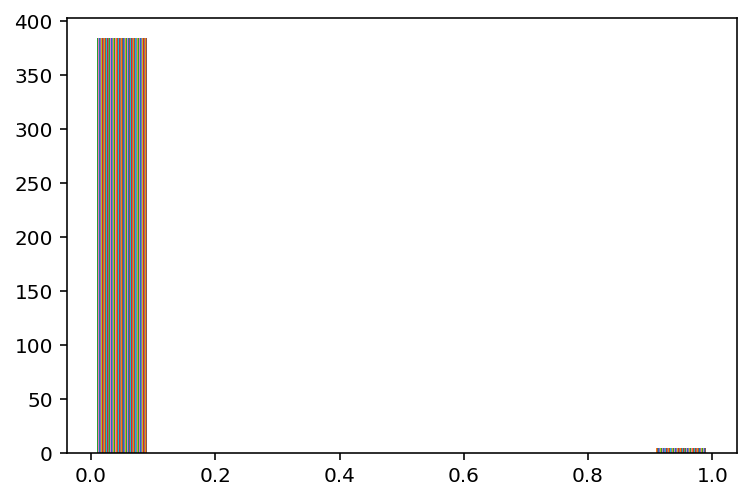

In [136]:
import matplotlib.pyplot as plt
plt.hist(pd.DataFrame(prediction).values.tolist())
plt.show()

Remove students not pairs, and test on them after training, remove k courses, see which ones pop up. Test on other domains. Try with all data. Compute f1. Plot precision and recall. Papers boi faltings on top k recommendations. Co enrollment matrix, weight probabilities of output by the student's chance of taking a course (obligatory). 

### Done
- All data gives really bad results (discrimination by section)
- Results are different from one domain to another (BEFORE WEIGHING OUT THE OBLIGATORY COURSES, or courses that are bloat (laboratories etc..., case by case basis ?)
- Computing the f1 score, prec and recall by row and average out
- [They talk a bit about top-N recommendation in this paper (Boi)](http://delivery.acm.org/10.1145/2810000/2800184/p179-maksai.pdf?ip=128.179.189.64&id=2800184&acc=ACTIVE%20SERVICE&key=FC66C24E42F07228%2E7E17DDD1CCA0F75B%2E4D4702B0C3E38B35%2E4D4702B0C3E38B35&CFID=1003867347&CFTOKEN=59100520&__acm__=1510214008_777b3b2b2f3763bb6c7aa57bcdcdf49a)

### Questions
- If we decide on keeping top-K recommendation metric, how would we deal with the fact that maybe there are clusters where the best K is 3, but others it will be 6 ?
- WTF: dropout was 0.50, now 0.998, way better results, higher dropout means less overfitting, so wtf ?
- Should weigh out the courses how ? In neural network or in ratings ?
- Are we sure on how to compute prec, rec, f1 ? For top-N rec sys, saw this:<br>The concept of ‘hit set’ is considered, containing only the recommended (top-N) items that are also in the test set.

    $recall = \frac{|hitset|}{|testset|}$
    <br>$precision = \frac{|hitset|}{N}$


### To do
- Move to the new data
- Take into account the study plan to compute percentage course taken (way of weighing)
- New precision and recall by user, and take average
- Pick k out of n for blocks, split options and obligatory recommendations
- Try on like 5 sections with same parameters if still good results
- Talk with Francisco about co enrolment matrix

In [155]:
print(courses_matrix.sum().sum())
baseline = 0.5
pred = prediction.copy()
pred[pred < baseline] = 0
pred[pred >= baseline] = 1
pred = pd.DataFrame(pred)
train_x_df = pd.DataFrame(train_x)
test_x_df = pd.DataFrame(test_x)

12048
2352


In [ ]:
flatten = courses_matrix.unstack().reset_index()
flatten = flatten.rename(columns={0:"Taken"})
random_user = flatten[(flatten.Taken == 1) & (flatten.PersonID == 974912207)]
random_user_id = courses_matrix.index.get_loc(key=974912207)
random_user_predictions = pred[random_user_id, -15:]
predicted_courses = [ courses_matrix.columns[i] for i in random_user_predictions ]

# Remove courses that were not given in the last year
last_year_courses = list(registrations.xs('2015-2016', level='YearName').index)
predicted_courses = [c for c in predicted_courses if c in last_year_courses]

print("The random user picked the following courses: \n{} \nHence we propose the following: {}"
     .format(random_user.SubjectName, predicted_courses[::-1] ))

In [ ]:
# Trying the Netflixprize solutions

In [ ]:
# Find other ones

In [ ]:
# Feature Engineering